In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import math
import heapq as hq

In [3]:
lc = pd.read_csv("LC data原始数据.csv")

In [4]:
lc.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual return,...,fico_range_low,revol_bal,revol_util,total_pymnt,last_pymnt_d,recoveries,loan_length,term_num,return_num,default
0,40715708,14500,14500,36 months,7.89,453.65,A,< 1 year,MORTGAGE,5214.683333,...,695,15449,44.4,14846.090000,2015/5/1,0.0,2.924085,36,0.036707,0
1,113093550,1000,1000,36 months,11.99,33.21,B,1 year,RENT,373.300000,...,725,5154,32.0,1022.724625,2018/2/1,0.0,7.063800,36,0.035226,0
2,8285371,16800,16800,60 months,21.70,461.14,E,10+ years,MORTGAGE,4089.120000,...,670,17843,87.5,26956.160310,2017/9/1,0.0,45.996838,60,0.151722,0
3,80248236,18000,18000,60 months,23.99,517.72,E,2 years,MORTGAGE,4463.640000,...,690,24126,61.4,6416.410000,2017/3/1,1700.0,8.969383,60,-0.118422,1
4,43490782,26000,26000,36 months,12.29,867.18,C,8 years,RENT,9731.800000,...,660,40580,71.7,31197.994840,2018/2/1,0.0,35.089016,36,0.066574,0


In [4]:
lc.sort_values("id",ascending=True,inplace=True)

In [5]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24977 entries, 21813 to 7101
Data columns (total 34 columns):
id                     24977 non-null int64
loan_amnt              24977 non-null int64
funded_amnt            24977 non-null int64
term                   24977 non-null object
int_rate               24977 non-null float64
installment            24977 non-null float64
grade                  24977 non-null object
emp_length             23681 non-null object
home_ownership         24977 non-null object
annual return          24977 non-null float64
annual_return_real     24977 non-null int64
annual_return_rate     24977 non-null object
annual_inc             24977 non-null float64
verification_status    24977 non-null object
issue_d                24977 non-null object
issue_year             24977 non-null int64
loan_status            24977 non-null object
purpose                24977 non-null object
dti                    24977 non-null float64
delinq_2yrs            24977 non-

In [6]:
lc.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,annual return,annual_return_real,annual_inc,issue_year,dti,...,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,return_num,default
count,2.497700e+04,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,2.497700e+04,24977.000000,24977.000000,...,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000
mean,4.230681e+07,14337.954919,14327.236057,13.419279,435.835973,4663.900167,3725.897866,7.649832e+04,2014.434119,17.854991,...,699.462345,695.462225,16244.176683,52.706462,14644.938097,202.956532,19.712644,41.889258,0.032157,0.198302
std,3.287700e+07,8554.714081,8546.646870,4.642481,255.956853,2737.275562,3086.819919,8.535719e+04,1.520860,9.387081,...,31.240879,31.240302,22381.881013,24.307153,10161.474810,886.676942,11.983145,10.327783,0.065604,0.398729
min,3.575090e+05,1000.000000,1000.000000,5.320000,22.590000,225.360000,0.000000,5.000000e+03,2009.000000,0.000000,...,664.000000,660.000000,0.000000,0.000000,81.190000,0.000000,0.919937,36.000000,-0.194823,0.000000
25%,1.017270e+07,7800.000000,7800.000000,9.990000,247.970000,2687.760000,1383.000000,4.590000e+04,2014.000000,11.530000,...,674.000000,670.000000,6047.000000,34.800000,6768.370000,0.000000,9.987885,36.000000,0.038496,0.000000
50%,3.970034e+07,12000.000000,12000.000000,12.990000,377.090000,3985.992000,3406.000000,6.500000e+04,2015.000000,17.310000,...,694.000000,690.000000,11205.000000,53.200000,12047.604720,0.000000,18.004476,36.000000,0.051205,0.000000
75%,6.763521e+07,20000.000000,20000.000000,16.290000,576.920000,6004.800000,5523.000000,9.000000e+04,2015.000000,23.680000,...,714.000000,710.000000,19761.000000,71.700000,20439.769570,0.000000,29.043718,36.000000,0.066530,0.000000
max,1.262132e+08,40000.000000,40000.000000,30.990000,1584.900000,16632.000000,16632.000000,7.600000e+06,2017.000000,641.360000,...,850.000000,845.000000,882984.000000,153.000000,59538.053040,23746.980000,62.030021,60.000000,0.182641,1.000000


In [7]:
lc.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual return',
       'annual_return_real', 'annual_return_rate', 'annual_inc',
       'verification_status', 'issue_d', 'issue_year', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default'],
      dtype='object')

In [9]:
lc.sort_values('grade',ascending=True,inplace=True)

In [17]:
lc.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual return,...,fico_range_low,revol_bal,revol_util,total_pymnt,last_pymnt_d,recoveries,loan_length,term_num,return_num,default
8534,32139303,20000,20000,60 months,8.39,409.28,A,10+ years,MORTGAGE,4335.600000,...,755,19797,19.9,22500.210000,2016/6/1,0.0,20.008624,60,0.054627,0
11477,43410252,8000,8000,36 months,6.92,246.73,A,10+ years,RENT,2851.200000,...,725,8171,16.5,8653.670000,2016/9/1,0.0,17.051685,36,0.045724,0
6364,71946369,6725,6725,36 months,5.32,202.53,A,10+ years,MORTGAGE,2360.923333,...,710,7357,31.4,6997.696531,2017/1/1,0.0,11.006386,36,0.038155,0
2512,36099631,15000,15000,36 months,6.03,456.54,A,10+ years,MORTGAGE,5301.500000,...,705,1800,17.6,16425.113940,2017/12/1,0.0,36.994599,36,0.042697,0
14850,36119634,12000,12000,36 months,7.49,373.22,A,3 years,MORTGAGE,4299.600000,...,695,16145,31.7,13428.903930,2017/11/1,0.0,35.023306,36,0.048633,0


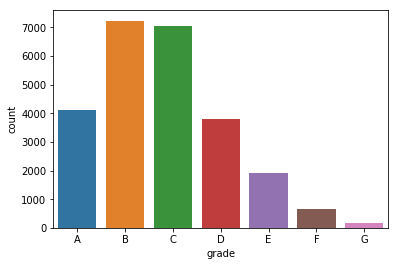

In [19]:
sns.countplot(x="grade",data=lc)

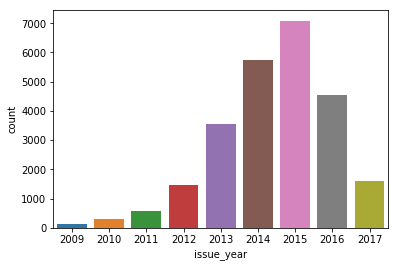

In [18]:
sns.countplot(x="issue_year",data=lc)

In [26]:
lcsum = lc.groupby("issue_year").sum()
lcsum

,id,loan_amnt,funded_amnt,int_rate,installment,annual return,annual_return_real,annual_inc,dti,delinq_2yrs,...,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,return_num,default
issue_year,,,,,,,,,,,,,,,,,,,,,
2009,57471683,1389700,1384375,1641.81,46285.55,5.208663e+05,452537,8.445225e+06,1856.52,11,...,97220,96680,1923909,6272.60,1.513416e+06,30950.64,3499.340849,4860,5.669623,19
2010,169455886,3127000,3044325,3546.20,91192.66,1.022289e+06,930059,2.107395e+07,3910.64,44,...,221308,220080,3910589,14564.90,3.466611e+06,11255.05,9426.361938,12996,15.429243,35
2011,488847974,7188825,7063775,6997.78,201764.35,2.165245e+06,1855142,4.198208e+07,7809.94,97,...,412821,410525,7995117,28416.61,7.998280e+06,72959.43,16824.197622,25536,28.366125,80
2012,2267887464,19863475,19808800,20098.54,616876.93,6.591288e+06,5512842,1.057537e+08,24781.76,310,...,1038558,1032670,22806509,85183.10,2.231701e+07,241726.83,39990.012115,60240,71.497988,239
2013,22079675940,50666150,50666150,50865.53,1568466.41,1.670362e+07,13947933,2.538847e+08,59841.74,976,...,2474832,2460680,58244805,206043.90,5.664650e+07,715434.46,89934.692707,146784,177.887356,577
2014,123510016179,82044250,82044250,77774.51,2509774.09,2.692530e+07,22075891,4.430151e+08,101221.99,2104,...,3990765,3967840,92727015,314913.50,8.807895e+07,1294958.94,136806.751683,238572,243.974769,1037
2015,369736789669,104384300,104384300,89890.89,3099967.73,3.328451e+07,25660502,5.471744e+08,133072.98,2501,...,4937608,4909270,118991246,369744.70,1.030471e+08,1653202.13,133090.207193,301248,180.607176,1635
2016,367088848803,66801250,66801250,61607.90,2050909.54,2.186981e+07,16267449,3.600411e+08,84804.81,1583,...,3174553,3156385,73522049,220025.00,6.137030e+07,945062.68,53842.485473,189768,52.394600,1115
2017,171298102340,22654150,22654150,22750.18,700637.84,7.407310e+06,6359396,1.293283e+08,28663.72,508,...,1122806,1116430,25609562,71285.00,2.134840e+07,103695.15,8948.651923,66264,27.368664,216


In [27]:
lcsum_grade = lc.groupby("grade").sum()
lcsum_grade

,id,loan_amnt,funded_amnt,int_rate,installment,annual return,annual_return_real,annual_inc,issue_year,dti,...,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,return_num,default
grade,,,,,,,,,,,,,,,,,,,,,
A,164105693291,56073250,56030150,29768.74,1714181.82,1.975401e+07,18469017,3.668809e+08,8288781,62117.34,...,3008277,2991815,72775932,162837.90,5.891574e+07,170526.17,88322.503544,150660,153.617917,262
B,295501883428,95130325,95072975,78486.53,2914499.19,3.257136e+07,28170925,5.461751e+08,14573901,124089.12,...,5075006,5046065,115315825,371541.70,9.988386e+07,721107.70,149784.200911,281628,269.543753,968
C,314933421623,98813450,98760550,99518.62,2968671.68,3.180100e+07,25100472,5.158465e+08,14232847,129541.29,...,4886175,4857915,112777034,392359.21,1.018886e+08,1370925.84,136181.753221,300324,232.485255,1517
D,160702141262,56693500,56670525,66323.04,1745857.43,1.798028e+07,12622363,2.662566e+08,7634761,73792.86,...,2602505,2587345,59124465,222504.00,5.620185e+07,1162137.04,70564.832954,169200,100.441692,1120
E,82946055635,34775425,34708450,39902.55,1032841.89,9.888756e+06,6218385,1.500560e+08,3885945,39125.59,...,1321936,1314220,31191556,115772.30,3.355771e+07,1059250.81,34239.290335,97956,37.816271,719
F,28878448295,12796600,12772175,16317.40,387630.95,3.449161e+06,1933708,5.065760e+07,1341647,13660.01,...,455439,452775,11586603,41066.00,1.192316e+07,472447.07,10764.048543,36480,9.468653,280
G,9629452404,3836550,3836550,4856.46,122192.14,1.045670e+06,546881,1.482581e+07,356639,3637.89,...,121133,120425,2959386,10368.20,3.415683e+06,112850.68,2506.071993,10020,-0.177998,87


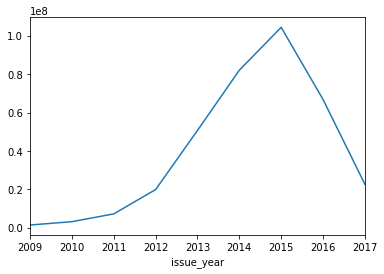

In [28]:
lcsum.loan_amnt.plot()

In [4]:
A = lc[lc["grade"]=="A"]
B = lc[lc["grade"]=="B"]
C = lc[lc["grade"]=="C"]
D = lc[lc["grade"]=="D"]
E = lc[lc["grade"]=="E"]
F = lc[lc["grade"]=="F"]
G = lc[lc["grade"]=="G"]

AttributeError: module 'matplotlib' has no attribute 'title'

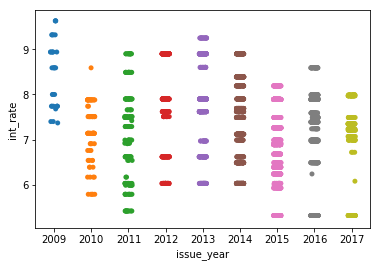

In [7]:
sns.stripplot(x="issue_year",y="int_rate",data=A)

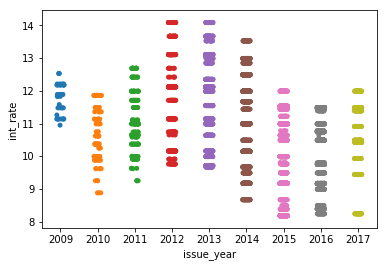

In [21]:
sns.stripplot(x="issue_year",y="int_rate",data=B)

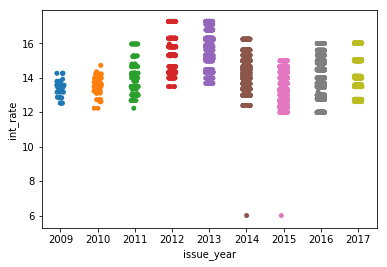

In [22]:
sns.stripplot(x="issue_year",y="int_rate",data=C)

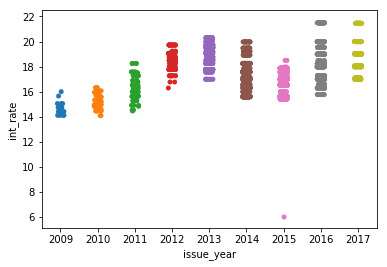

In [23]:
sns.stripplot(x="issue_year",y="int_rate",data=D)

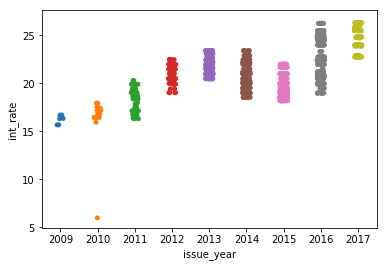

In [24]:
sns.stripplot(x="issue_year",y="int_rate",data=E)

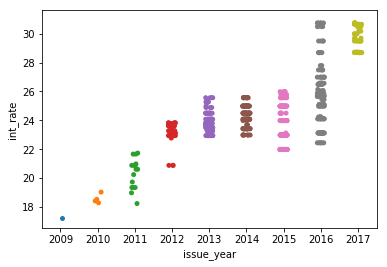

In [25]:
sns.stripplot(x="issue_year",y="int_rate",data=F)

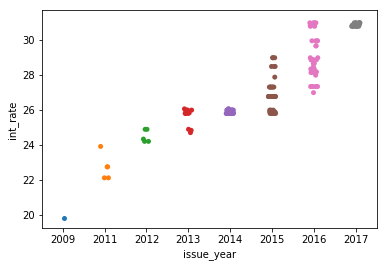

In [26]:
sns.stripplot(x="issue_year",y="int_rate",data=G)

In [5]:
grade1 = pd.get_dummies(lc["grade"],drop_first=True)
homeown1 = pd.get_dummies(lc["home_ownership"],drop_first=True)
purpose1 = pd.get_dummies(lc["purpose"],drop_first=True)

In [6]:
lc_dummy = pd.concat([lc,grade1,homeown1,purpose1],axis=1)
lc_dummy.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual return,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,40715708,14500,14500,36 months,7.89,453.65,A,< 1 year,MORTGAGE,5214.683333,...,0,0,0,0,0,0,0,0,0,0
1,113093550,1000,1000,36 months,11.99,33.21,B,1 year,RENT,373.300000,...,0,0,0,0,0,0,0,0,1,0
2,8285371,16800,16800,60 months,21.70,461.14,E,10+ years,MORTGAGE,4089.120000,...,0,0,0,0,0,0,0,0,0,0
3,80248236,18000,18000,60 months,23.99,517.72,E,2 years,MORTGAGE,4463.640000,...,0,0,0,0,0,0,0,0,0,0
4,43490782,26000,26000,36 months,12.29,867.18,C,8 years,RENT,9731.800000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
lc_dummy.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual return',
       'annual_return_real', 'annual_return_rate', 'annual_inc',
       'verification_status', 'issue_d', 'issue_year', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default', 'B', 'C', 'D', 'E',
       'F', 'G', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [8]:
lc_dummy.drop(["grade","purpose","home_ownership"],axis=1,inplace=True)
lc_dummy.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'annual return', 'annual_return_real',
       'annual_return_rate', 'annual_inc', 'verification_status', 'issue_d',
       'issue_year', 'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default', 'B', 'C', 'D', 'E',
       'F', 'G', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [9]:
lc_dummy.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual return,annual_return_real,annual_return_rate,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,40715708,14500,14500,36 months,7.89,453.65,< 1 year,5214.683333,5215,36.0%,...,0,0,0,0,0,0,0,0,0,0
1,113093550,1000,1000,36 months,11.99,33.21,1 year,373.300000,373,37.3%,...,0,0,0,0,0,0,0,0,1,0
2,8285371,16800,16800,60 months,21.70,461.14,10+ years,4089.120000,4089,24.3%,...,0,0,0,0,0,0,0,0,0,0
3,80248236,18000,18000,60 months,23.99,517.72,2 years,4463.640000,0,0.0%,...,0,0,0,0,0,0,0,0,0,0
4,43490782,26000,26000,36 months,12.29,867.18,8 years,9731.800000,9732,37.4%,...,0,0,0,0,0,0,0,0,0,0


In [10]:
lc_dummy.to_csv("lc_dummy.csv")

In [11]:
lc_dummy = pd.read_csv("lc_dummy.csv")

In [12]:
lc_dummy.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'emp_length', 'annual return', 'annual_return_real',
       'annual_return_rate', 'annual_inc', 'verification_status', 'issue_d',
       'issue_year', 'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default', 'B', 'C', 'D', 'E',
       'F', 'G', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [18]:
x=lc_dummy[['B', 'C', 'D', 'E','F', 'G','MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding']]
y=lc_dummy["default"]

logit=sm.Logit(y,x)
result=logit.fit()
result.summary()

         Current function value: 0.464218
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                24977
Model:                          Logit   Df Residuals:                    24953
Method:                           MLE   Df Model:                           23
Date:                Sun, 10 Nov 2019   Pseudo R-squ.:                 0.06791
Time:                        09:28:32   Log-Likelihood:                -11595.
converged:                      False   LL-Null:                       -12440.
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
B                      0.7835      0.072     10.810      0.000       0.641       0.926
C                      1.3656      0.070     19.446      0.000       1.228       1.503
D                      1.7954      0.074     24.409      0.000       1.651       1.940
E                      2.1428      0.080     26.810      0.000       1.986       2.299
F                      2.3507      0.102     23.031      0.000       2.151       2.551
G                      2.6554      0.165     16.123      0.000       2.333       2.978
MORTGAGE              -2.8823      0.179    -16.117      0.000      -3.233      -2.532
NONE                 -37.2059   2.76e+07  -1.35e-06      1.000    -5.4e+07     5.4e+07
OTHER                -38.8555   6.31e+07  -6.16e-07      1.000   -1.24e+08    1.24e+08
OWN                   -2.7316      0.184    -14.832      0.000      -3.093      -2.371
RENT                  -2.5747      0.179    -14.383      0.000      -2.926      -2.224
credit_card            0.1442      0.173      0.836      0.403      -0.194       0.482
debt_consolidation     0.0836      0.170      0.492      0.623      -0.249       0.417
educational          -17.0265   4680.725     -0.004      0.997   -9191.078    9157.025
home_improvement       0.0055      0.183      0.030      0.976      -0.354       0.365
house                  0.1353      0.280      0.484      0.628      -0.413       0.683
major_purchase        -0.0684      0.206     -0.332      0.740      -0.472       0.336
medical                0.1569      0.223      0.703      0.482      -0.281       0.594
moving                -0.2354      0.264     -0.890      0.373      -0.754       0.283
other                 -0.1246      0.182     -0.684      0.494      -0.482       0.233
renewable_energy       0.1821      0.512      0.356      0.722      -0.822       1.186
small_business         0.2612      0.214      1.220      0.222      -0.158       0.681
vacation              -0.3854      0.280     -1.377      0.169      -0.934       0.163
wedding               -0.5243      0.407     -1.287      0.198      -1.323       0.274
======================================================================================
"""

In [2]:
lc2 = pd.read_csv("lc_dummy2.csv")

In [3]:
lc2.head()

,id,B,C,D,E,F,G,funded_amnt,annual_inc,issue_year,...,kind,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,p*,false positive,true positive,false positive.1,true positive.1
0,0,0,0,0,0,0,0,14500,58761.0,2015,...,1,1,true negative,NaN,NaN,0.05,0.0001,0.000202,0.945316,0.989299
1,1,1,0,0,0,0,0,1000,65000.0,2017,...,1,2,false positive,NaN,NaN,0.10,0.0001,0.000202,0.757691,0.929134
2,2,0,0,0,1,0,0,16800,65000.0,2013,...,1,3,false negative,NaN,NaN,0.15,0.0001,0.000202,0.539153,0.804967
3,3,0,0,0,1,0,0,18000,101000.0,2016,...,3,4,true positive,NaN,NaN,0.20,0.0001,0.000202,0.358420,0.636584
4,4,0,1,0,0,0,0,26000,65000.0,2015,...,1,NaN,NaN,NaN,NaN,0.25,0.0001,0.000202,0.219986,0.483545


In [5]:
lc2.columns

Index(['id', 'B', 'C', 'D', 'E', 'F', 'G', 'funded_amnt', 'annual_inc',
       'issue_year', 'dti', 'fico_avg', 'emp_length', 'revol_bal', 'term_num',
       'default', 'w', 'default probability', '0.9', 'score', 'kind',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'p*',
       'false positive', 'true positive', 'false positive.1',
       'true positive.1'],
      dtype='object')

In [9]:
lc2=lc2[['B', 'C', 'D', 'E', 'F', 'G', 'funded_amnt', 'annual_inc',
       'issue_year', 'dti', 'fico_avg', 'emp_length', 'revol_bal', 'term_num',
       'default']]

In [10]:
lc2.head()

,B,C,D,E,F,G,funded_amnt,annual_inc,issue_year,dti,fico_avg,emp_length,revol_bal,term_num,default
0,0,0,0,0,0,0,14500,58761.0,2015,21.94,697.0,0,15449,36,0
1,1,0,0,0,0,0,1000,65000.0,2017,25.68,727.0,1,5154,36,0
2,0,0,0,1,0,0,16800,65000.0,2013,5.93,672.0,10,17843,60,0
3,0,0,0,1,0,0,18000,101000.0,2016,28.91,692.0,2,24126,60,1
4,0,1,0,0,0,0,26000,65000.0,2015,24.92,662.0,8,40580,36,0


In [11]:
lc2.to_csv("lc2final.csv")

In [13]:
lc2.columns

Index(['B', 'C', 'D', 'E', 'F', 'G', 'funded_amnt', 'annual_inc', 'issue_year',
       'dti', 'fico_avg', 'emp_length', 'revol_bal', 'term_num', 'default'],
      dtype='object')

In [14]:
x=lc2[['B', 'C', 'D', 'E', 'F', 'G', 'funded_amnt', 'annual_inc', 'issue_year',
       'dti', 'fico_avg', 'emp_length', 'revol_bal', 'term_num']]
y=lc2['default']
logit=sm.Logit(y,x)

result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.458652
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                24977
Model:                          Logit   Df Residuals:                    24963
Method:                           MLE   Df Model:                           13
Date:                Sun, 26 Jan 2020   Pseudo R-squ.:                 0.07909
Time:                        14:07:07   Log-Likelihood:                -11456.
converged:                       True   LL-Null:                       -12440.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
B               0.5289      0.076      7.003      0.000       0.381       0.677
C               0.9362      0.076     12.263      0.000       0.787       1.086
D               1.2578      0.081     15.452      0.000       1.098       1.417
E               1.4672      0.091     16.198      0.000       1.290       1.645
F               1.5810      0.113     13.999      0.000       1.360       1.802
G               1.8194      0.173     10.513      0.000       1.480       2.159
funded_amnt  7.637e-06   2.45e-06      3.120      0.002    2.84e-06    1.24e-05
annual_inc  -1.163e-06    4.6e-07     -2.527      0.011   -2.07e-06   -2.61e-07
issue_year      0.0006      0.000      2.416      0.016       0.000       0.001
dti             0.0239      0.002     11.399      0.000       0.020       0.028
fico_avg       -0.0066      0.001     -9.224      0.000      -0.008      -0.005
emp_length     -0.0221      0.004     -5.036      0.000      -0.031      -0.014
revol_bal   -3.773e-06   1.11e-06     -3.399      0.001   -5.95e-06    -1.6e-06
term_num        0.0184      0.002     10.302      0.000       0.015       0.022
===============================================================================
"""

In [ ]:
xliner=lc_dummy[['B', 'C', 'D', 'E', 'F', 'G', 'funded_amnt', 'annual_inc', 'issue_year',
       'dti', 'fico_avg', 'emp_length', 'revol_bal', 'term_num']]
yliner = lc_dummy["int_rate"]

x2=sm.add_constant(xliner)
est=sm.OLS(yliner,x2)  #OLS最小二乘法
est2=est.fit()
print(est2.summary())#线性回归

In [19]:
xliner=lc_dummy[['B', 'C', 'D', 'E','F', 'G',
             'funded_amnt', 'annual_inc','issue_year','dti',
             'fico_avg',"emp_length",
             'revol_bal', 'revol_util','term_num']]
yliner = lc_dummy["int_rate"]

x2=sm.add_constant(xliner)
est=sm.OLS(yliner,x2)  #OLS最小二乘法
est2=est.fit()
print(est2.summary())#线性回归

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:28:39   Log-Likelihood:                -43267.
No. Observations:               24977   AIC:                         8.657e+04
Df Residuals:                   24961   BIC:                         8.670e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         261.0621     11.872     21.991      

In [19]:
loan_amount = lc.pivot_table(index="issue_year",values="loan_amnt",aggfunc="sum")

In [20]:
loan_amount

,loan_amnt
issue_year,
2009,1389700
2010,3127000
2011,7188825
2012,19863475
2013,50666150
2014,82044250
2015,104384300
2016,66801250
2017,22654150


In [12]:
lc.corr()

,id,loan_amnt,funded_amnt,int_rate,installment,annual return,annual_return_real,annual_inc,issue_year,dti,...,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,return_num,default
id,1.000000,0.029861,0.031472,-0.005652,0.028283,0.023592,-0.018265,0.031119,0.904868,0.082372,...,-0.022484,-0.022485,0.007211,-0.144073,-0.077225,-0.013403,-0.538157,0.013114,-0.213864,0.050967
loan_amnt,0.029861,1.000000,0.999398,0.164713,0.952362,0.908905,0.617486,0.256846,0.058676,0.035597,...,0.093887,0.093888,0.312770,0.116078,0.849916,0.168242,-0.009975,0.399678,-0.030994,0.059495
funded_amnt,0.031472,0.999398,1.000000,0.164618,0.953293,0.909019,0.617866,0.256770,0.061682,0.036137,...,0.092700,0.092701,0.312771,0.116421,0.850332,0.168224,-0.010947,0.398422,-0.031130,0.059238
int_rate,-0.005652,0.164713,0.164618,1.000000,0.171074,0.053175,-0.119022,-0.046209,0.007951,0.162683,...,-0.417156,-0.417159,-0.014263,0.255606,0.094975,0.168472,-0.097452,0.421093,-0.084452,0.240501
installment,0.028283,0.952362,0.953293,0.171074,1.000000,0.984737,0.677711,0.250573,0.059061,0.039302,...,0.040789,0.040789,0.300527,0.136556,0.811342,0.149284,-0.018651,0.156826,-0.024880,0.045853
annual return,0.023592,0.908905,0.909019,0.053175,0.984737,1.000000,0.714041,0.252609,0.053859,0.022205,...,0.068232,0.068232,0.298433,0.116019,0.782104,0.115658,-0.006468,0.019870,-0.009803,0.012070
annual_return_real,-0.018265,0.617486,0.617866,-0.119022,0.677711,0.714041,1.000000,0.205179,0.003000,-0.057131,...,0.135540,0.135540,0.232612,0.043375,0.836180,-0.276296,0.110328,-0.083229,0.529956,-0.600326
annual_inc,0.031119,0.256846,0.256770,-0.046209,0.250573,0.252609,0.205179,1.000000,0.033282,-0.137629,...,0.070102,0.070097,0.219736,0.020119,0.232065,0.023230,-0.023115,0.044359,0.019998,-0.033277
issue_year,0.904868,0.058676,0.061682,0.007951,0.059061,0.053859,0.003000,0.033282,1.000000,0.104642,...,-0.076584,-0.076586,0.016024,-0.107363,-0.040600,0.001075,-0.487088,0.013293,-0.191506,0.054986
dti,0.082372,0.035597,0.036137,0.162683,0.039302,0.022205,-0.057131,-0.137629,0.104642,1.000000,...,-0.086715,-0.086710,0.120647,0.165654,-0.010267,0.049112,-0.030956,0.067222,-0.089455,0.114099


In [29]:
x=lc[['loan_amnt', 'funded_amnt','int_rate', 'installment', 'annual_inc',
      'issue_year', 'fico_range_high', 'fico_range_low', 'revol_bal',
      'term_num', 'default' ]]
y=lc['grade']

In [21]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24977 entries, 0 to 24976
Data columns (total 34 columns):
id                     24977 non-null int64
loan_amnt              24977 non-null int64
funded_amnt            24977 non-null int64
term                   24977 non-null object
int_rate               24977 non-null float64
installment            24977 non-null float64
grade                  24977 non-null object
emp_length             23681 non-null object
home_ownership         24977 non-null object
annual return          24977 non-null float64
annual_return_real     24977 non-null int64
annual_return_rate     24977 non-null object
annual_inc             24977 non-null float64
verification_status    24977 non-null object
issue_d                24977 non-null object
issue_year             24977 non-null int64
loan_status            24977 non-null object
purpose                24977 non-null object
dti                    24977 non-null float64
delinq_2yrs            24977 non-nul

In [12]:
lc.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual return',
       'annual_return_real', 'annual_return_rate', 'annual_inc',
       'verification_status', 'issue_d', 'issue_year', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'fico_range_high', 'fico_range_low', 'revol_bal',
       'revol_util', 'total_pymnt', 'last_pymnt_d', 'recoveries',
       'loan_length', 'term_num', 'return_num', 'default'],
      dtype='object')

In [7]:
x=lc[['funded_amnt', 'int_rate','annual_inc',
      'dti', 'fico_range_high', 'fico_range_low', 'revol_bal','loan_length', 'term_num']]
y=lc["default"]

In [8]:
logit=sm.Logit(y,x)
result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.446815
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                24977
Model:                          Logit   Df Residuals:                    24968
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Nov 2019   Pseudo R-squ.:                  0.1029
Time:                        23:06:54   Log-Likelihood:                -11160.
converged:                       True   LL-Null:                       -12440.
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
funded_amnt      8.171e-06    2.5e-06      3.273      0.001    3.28e-06    1.31e-05
int_rate            0.0679      0.004     15.763      0.000       0.059       0.076
annual_inc      -2.173e-06   4.91e-07     -4.431      0.000   -3.13e-06   -1.21e-06
dti                 0.0235      0.002     11.069      0.000       0.019       0.028
fico_range_high     0.8026      0.125      6.425      0.000       0.558       1.047
fico_range_low     -0.8115      0.126     -6.461      0.000      -1.058      -0.565
revol_bal       -3.423e-06    1.1e-06     -3.105      0.002   -5.58e-06   -1.26e-06
loan_length        -0.0393      0.002    -25.582      0.000      -0.042      -0.036
term_num            0.0218      0.002     12.084      0.000       0.018       0.025
===================================================================================
"""

In [ ]:
x=lc[['funded_amnt', 'int_rate','annual_inc',
      'dti', 'fico_range_high', 'fico_range_low', 'revol_bal','loan_length', 'term_num']]
y=["int_rate"]

In [4]:
x=lc[['funded_amnt', 'int_rate','annual_inc',
      'dti', 'fico_range_high', 'fico_range_low', 'revol_bal','loan_length', 'term_num']]
y=["int_rate"]
x2=sm.add_constant(x)
est=sm.OLS(y,x2)  #OLS最小二乘法
est2=est.fit()
print(est2.summary())#线性回归

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     254.4
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:05:29   Log-Likelihood:                -11148.
No. Observations:               24977   AIC:                         2.232e+04
Df Residuals:                   24965   BIC:                         2.242e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.6903      3.838     

In [31]:
np.asarray(lc)

array([[357509, 7500, 7500, ..., 36, -0.09675523800000001, 1],
       [369883, 15000, 15000, ..., 36, 0.05640101, 0],
       [370423, 11500, 11500, ..., 36, 0.056152744000000004, 0],
       ...,
       [126105221, 2500, 2500, ..., 36, 0.041657834, 0],
       [126168362, 8000, 8000, ..., 36, 0.03183559, 0],
       [126213192, 15000, 15000, ..., 60, 0.039120001, 0]], dtype=object)

In [ ]:
sns.heatmap(lc.corr(),annot=True)

In [10]:
lc.corr()

,id,loan_amnt,funded_amnt,int_rate,installment,annual return,annual_return_real,annual_inc,issue_year,dti,...,fico_range_high,fico_range_low,revol_bal,revol_util,total_pymnt,recoveries,loan_length,term_num,return_num,default
id,1.000000,0.029861,0.031472,-0.005652,0.028283,0.023592,-0.018265,0.031119,0.904868,0.082372,...,-0.022484,-0.022485,0.007211,-0.144073,-0.077225,-0.013403,-0.538157,0.013114,-0.213864,0.050967
loan_amnt,0.029861,1.000000,0.999398,0.164713,0.952362,0.908905,0.617486,0.256846,0.058676,0.035597,...,0.093887,0.093888,0.312770,0.116078,0.849916,0.168242,-0.009975,0.399678,-0.030994,0.059495
funded_amnt,0.031472,0.999398,1.000000,0.164618,0.953293,0.909019,0.617866,0.256770,0.061682,0.036137,...,0.092700,0.092701,0.312771,0.116421,0.850332,0.168224,-0.010947,0.398422,-0.031130,0.059238
int_rate,-0.005652,0.164713,0.164618,1.000000,0.171074,0.053175,-0.119022,-0.046209,0.007951,0.162683,...,-0.417156,-0.417159,-0.014263,0.255606,0.094975,0.168472,-0.097452,0.421093,-0.084452,0.240501
installment,0.028283,0.952362,0.953293,0.171074,1.000000,0.984737,0.677711,0.250573,0.059061,0.039302,...,0.040789,0.040789,0.300527,0.136556,0.811342,0.149284,-0.018651,0.156826,-0.024880,0.045853
annual return,0.023592,0.908905,0.909019,0.053175,0.984737,1.000000,0.714041,0.252609,0.053859,0.022205,...,0.068232,0.068232,0.298433,0.116019,0.782104,0.115658,-0.006468,0.019870,-0.009803,0.012070
annual_return_real,-0.018265,0.617486,0.617866,-0.119022,0.677711,0.714041,1.000000,0.205179,0.003000,-0.057131,...,0.135540,0.135540,0.232612,0.043375,0.836180,-0.276296,0.110328,-0.083229,0.529956,-0.600326
annual_inc,0.031119,0.256846,0.256770,-0.046209,0.250573,0.252609,0.205179,1.000000,0.033282,-0.137629,...,0.070102,0.070097,0.219736,0.020119,0.232065,0.023230,-0.023115,0.044359,0.019998,-0.033277
issue_year,0.904868,0.058676,0.061682,0.007951,0.059061,0.053859,0.003000,0.033282,1.000000,0.104642,...,-0.076584,-0.076586,0.016024,-0.107363,-0.040600,0.001075,-0.487088,0.013293,-0.191506,0.054986
dti,0.082372,0.035597,0.036137,0.162683,0.039302,0.022205,-0.057131,-0.137629,0.104642,1.000000,...,-0.086715,-0.086710,0.120647,0.165654,-0.010267,0.049112,-0.030956,0.067222,-0.089455,0.114099


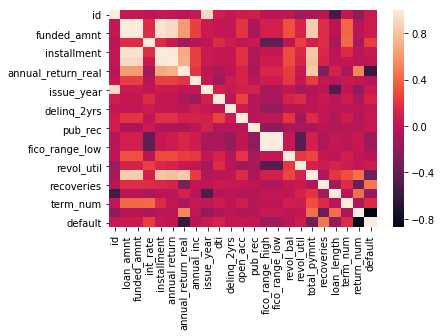

In [13]:
sns.heatmap(lc.corr())

In [4]:
lc2 = pd.read_csv("lc_dummy2.csv")
lc2.head()

,id,funded_amnt,emp_length,annual_inc,issue_year,dti,fico_avg,revol_bal,term_num,B,C,D,E,F,G,default,default probability
0,0,14500,0,58761.0,2015,21.94,697.0,15449,36,0,0,0,0,0,0,0,=
1,1,1000,1,65000.0,2017,25.68,727.0,5154,36,1,0,0,0,0,0,0,NaN
2,2,16800,10,65000.0,2013,5.93,672.0,17843,60,0,0,0,1,0,0,0,NaN
3,3,18000,2,101000.0,2016,28.91,692.0,24126,60,0,0,0,1,0,0,1,NaN
4,4,26000,8,65000.0,2015,24.92,662.0,40580,36,0,1,0,0,0,0,0,NaN


In [8]:
lc2.describe()

,id,funded_amnt,emp_length,annual_inc,issue_year,dti,fico_avg,revol_bal,term_num,B,C,D,E,F,G,default
count,24977.000000,24977.000000,24977.000000,2.497700e+04,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000
mean,12488.000000,14327.236057,5.658886,7.649832e+04,2014.434119,17.854991,697.462285,16244.176683,41.889258,0.289666,0.282860,0.151740,0.077231,0.026665,0.007087,0.198302
std,7210.383173,8546.646870,3.807296,8.535719e+04,1.520860,9.387081,31.240590,22381.881013,10.327783,0.453617,0.450398,0.358775,0.266963,0.161104,0.083884,0.398729
min,0.000000,1000.000000,0.000000,5.000000e+03,2009.000000,0.000000,662.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6244.000000,7800.000000,2.000000,4.590000e+04,2014.000000,11.530000,672.000000,6047.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12488.000000,12000.000000,6.000000,6.500000e+04,2015.000000,17.310000,692.000000,11205.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18732.000000,20000.000000,10.000000,9.000000e+04,2015.000000,23.680000,712.000000,19761.000000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24976.000000,40000.000000,10.000000,7.600000e+06,2017.000000,641.360000,847.500000,882984.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
lc2.columns

Index(['id', 'funded_amnt', 'emp_length', 'annual_inc', 'issue_year', 'dti',
       'fico_avg', 'revol_bal', 'term_num', 'B', 'C', 'D', 'E', 'F', 'G',
       'default'],
      dtype='object')

In [17]:
funded_amnt2 = lc2["funded_amnt"]/40000
emp_length2 = lc2["emp_length"]/10
annual_inc2 = lc2["annual_inc"]/7600000
issue_year2 = (lc2["issue_year"]-2008)/11
dti2 = lc2["dti"]/641.36
fico_avg2 = lc2["fico_avg"]/847.5
revol_bal2 = lc2["revol_bal"]/882984
term_num2 = lc2["term_num"]/60

In [33]:
funded_amnt2 = lc2["funded_amnt"]*(7.864e-06)/40000*(10e5)
emp_length2 = lc2["emp_length"]*(-0.022)/10*(10e5)
annual_inc2 = lc2["annual_inc"]*(-1.167e-06)/7600000*(10e5)
issue_year2 = (lc2["issue_year"]-2008)*(0.0008)/11*(10e5)
dti2 = lc2["dti"]*(0.0242)/641.36*(10e5)
fico_avg2 = lc2["fico_avg"]*(-0.0071)/847.5*(10e5)
revol_bal2 = lc2["revol_bal"]*(-3.21e-06)/882984*(10e5)
term_num2 = lc2["term_num"]*(0.0183)/60*(10e5)

In [34]:
lcfactor = pd.concat([funded_amnt2, emp_length2, annual_inc2, issue_year2, dti2, fico_avg2, revol_bal2, term_num2],axis=1)
lcfactor.describe()

,funded_amnt,emp_length,annual_inc,issue_year,dti,fico_avg,revol_bal,term_num
count,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000,24977.000000
mean,2.816735,-12449.549586,-0.011747,467.935956,673.710198,-5843.046874,-0.059054,12776.223726
std,1.680271,8376.051564,0.013107,110.607978,354.196340,261.720576,0.081367,3149.973850
min,0.196600,-22000.000000,-1.167000,72.727273,0.000000,-7100.000000,-3.210000,10980.000000
25%,1.533480,-22000.000000,-0.013820,436.363636,435.053636,-5964.837758,-0.071839,10980.000000
50%,2.359200,-13200.000000,-0.009981,509.090909,653.146439,-5797.286136,-0.040735,10980.000000
75%,3.932000,-4400.000000,-0.007048,509.090909,893.501310,-5629.734513,-0.021983,10980.000000
max,7.864000,-0.000000,-0.000768,654.545455,24200.000000,-5545.958702,-0.000000,18300.000000


In [35]:
lcfactor.to_csv("lcfactor.csv")

In [58]:
lcfactor[0:1]

,funded_amnt,emp_length,annual_inc,issue_year,dti,fico_avg,revol_bal,term_num
0,2.8507,-0.0,-0.009023,509.090909,827.847075,-5839.174041,-0.056163,10980.0


In [55]:
p1=np.array([1,2,3,4,5,6])
p2=np.array([4,5,6,7,8,9])
p3 = p2-p1
op1=np.sqrt(np.sum(np.square(p3)))
op1

7.3484692283495345

In [71]:
def pdist(i):
    p1 = lcfactor[i:i+1]
    for j in range(0,24978):
            p2 = lcfactor[j:j+1]
            p3 = p2-p1
            pdist[j]=np.sqrt(np.sum(np.square(p3)))
    min_3 = heapq.nsmallest(4, pdist)
    return 

In [ ]:
for i in range()

In [72]:
pdist(1)

TypeError: 'function' object does not support item assignment